In [2]:
import torch
from diffusers import DiffusionPipeline
from pipeline_sdxs import SdxsPipeline

device = "cuda"
variant = "fp16"
pipe_id = "/workspace/sdxs"
pipeline = SdxsPipeline.from_pretrained(
    pipe_id,
    variant=variant,
    device = device
).to(device=device, dtype=torch.float16) 
print(pipeline)

Keyword arguments {'device': 'cuda'} are not expected by SdxsPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Successfully loaded text_projector from ./text_projector cuda torch.float16
SdxsPipeline {
  "_class_name": "SdxsPipeline",
  "_diffusers_version": "0.33.1",
  "_name_or_path": "/workspace/sdxs",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "XLMRobertaModel"
  ],
  "tokenizer": [
    "transformers",
    "XLMRobertaTokenizerFast"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



Генерация: 100%|██████████| 40/40 [00:06<00:00,  5.85it/s]


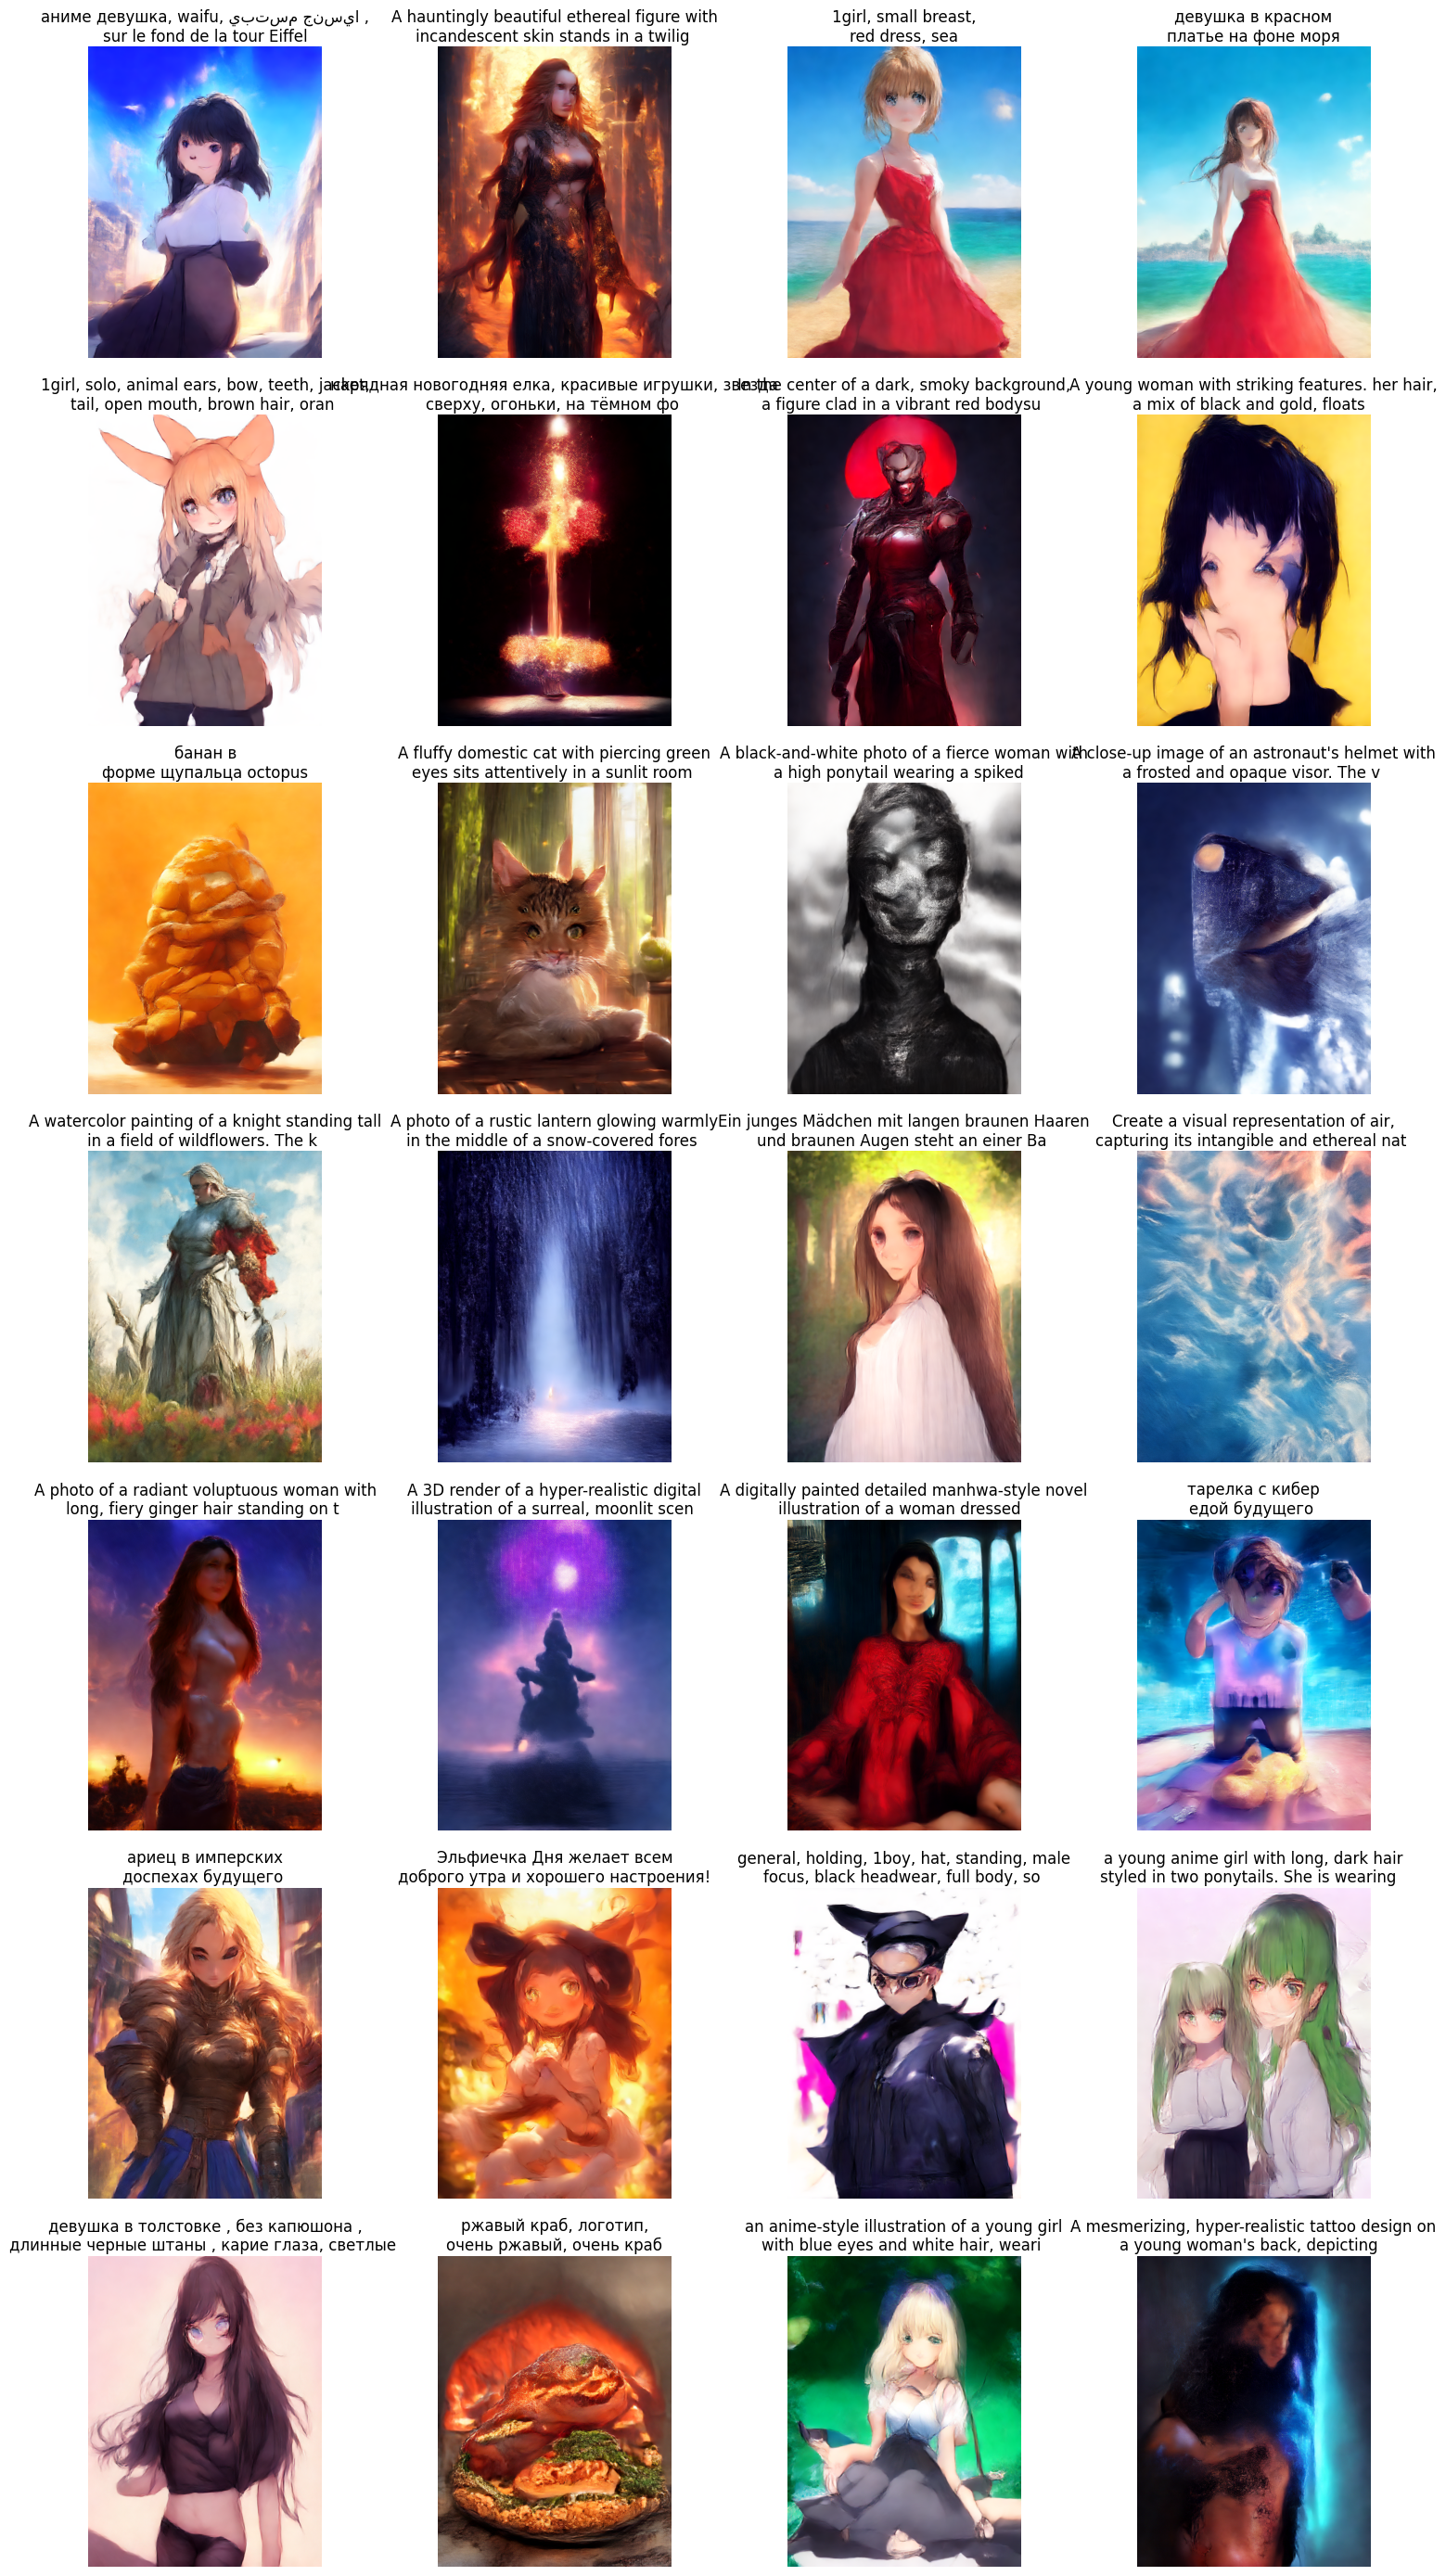

In [9]:
prompts = [
'аниме девушка, waifu, يبتسم جنسيا , sur le fond de la tour Eiffel'
,"A hauntingly beautiful ethereal figure with incandescent skin stands in a twilight forest, her form partially decaying yet radiating an inner light. Her silhouette blends elements of Art Nouveau elegance and cybernetic futurism, evoking the styles of Sorayama and Beksinski. Warm hues of sunset glow through the misty canopy, casting a golden light on the intricate details of her decaying flesh and metallic enhancements. In the background, surreal, ghostly trees with vibrant autumn leaves create a melancholic atmosphere, reminiscent of the works by Rockwell and Parrish."
,"1girl, small breast, red dress, sea"
,"девушка в красном платье на фоне моря"
,"1girl, solo, animal ears, bow, teeth, jacket, tail, open mouth, brown hair, orange background, bowtie, orange nails, simple background, cat ears, orange eyes, blue bow, animal ear fluff, cat tail, looking at viewer, upper body, shirt, school uniform, hood, striped bow, striped, white shirt, black jacket, blue bowtie, fingernails, long sleeves, cat girl, bangs, fangs, collared shirt, striped bowtie, short hair, tongue, hoodie, sharp teeth, facial mark, claw pose"
,"нарядная новогодняя елка, красивые игрушки, звезда сверху, огоньки, на тёмном фоне"
,"In the center of a dark, smoky background, a figure clad in a vibrant red bodysuit stands out. The suit is adorned with intricate designs and armor plating, giving it a formidable appearance. The helmet, matching the suit, features a visor with glowing red eyes, adding to the mysterious aura of the character."
,"A young woman with striking features. her hair, a mix of black and gold, floats around her head, adding a sense of movement to the scene. her eyes, a vibrant yellow, are half-closed, giving her a contemplative expression. she is dressed in a blue sweater, which contrasts with the black background. the overall composition of the image is simple yet striking, with the womans profile taking center stage"
,"банан в форме щупальца octopus"
,'A fluffy domestic cat with piercing green eyes sits attentively in a sunlit room filled natural light streaming through large windows, its soft fur reflecting warm hues of orange from the golden glow casting across its sleek body and delicate features'
,"A black-and-white photo of a fierce woman with a high ponytail wearing a spiked iron mask. The mask's sharp, metallic spikes add a menacing aura, contrasting with her soft yet intense expression. Her skin is marked with dirt, showcasing the aftermath of her battles, but her eyes reveal determination and strength. The spiked mask captures her mysterious and intimidating nature, adding to the intensity of the moment."
,"A close-up image of an astronaut's helmet with a frosted and opaque visor. The visor reflects the cold, frozen texture of space. Resting on the surface of the visor is a butterfly with vibrant, intricately patterned wings. The contrast between the delicate natural beauty of the butterfly and the cold, industrial helmet creates a striking image. The butterfly adds a touch of fragility and life to the otherwise harsh and unfeeling setting. The faint glow of distant stars can be seen through the frost, further enhancing the surreal atmosphere."
,"A watercolor painting of a knight standing tall in a field of wildflowers. The knight's armor is a mixture of soft greys and silvers, and he holds a large red rose. The background is a hazy wash of pale blue skies and distant mountains. The knight's strong yet serene posture creates an intriguing contrast between the image of a warrior and the delicate beauty of the flowers."
,"A photo of a rustic lantern glowing warmly in the middle of a snow-covered forest trail. The trail is lined with tall, snow-covered trees with faint branches. Soft falling snowflakes are visible, creating a serene atmosphere. The background is dark and mysterious. The overall image has a sense of solitude and magic."
,"Ein junges Mädchen mit langen braunen Haaren und braunen Augen steht an einer Backsteinwand, trägt ein weißes Hemd mit einem schwarzen Matrosenkragen und einen schwarzen Faltenrock. Sie lächelt und schaut direkt zum Betrachter, während Sonnenlicht durch die grünen Ranken hinter ihr fällt."
,"Create a visual representation of air, capturing its intangible and ethereal nature. Depict the movement, transparency, and lightness of air, perhaps through flowing lines, subtle gradients, or abstract forms. Consider incorporating elements like wind, breath, or atmospheric effects to convey its presence and essence"
,"A photo of a radiant voluptuous woman with long, fiery ginger hair standing on the edge of the Grand Canyon in Arizona during twilight. The sky is painted in deep purples and burnt oranges as the last light of the sun fades behind the rocky cliffs. The woman is wearing a halter top in rich earth tones with intricate lace details and a plunging neckline, black thong shorts, and silver rings and stacked bangles. Her piercing light-blue eyes gleam with quiet wonder as she gazes at the glowing wonder around her. The woman embodies the untamed spirit of the night, attuned to the quiet magic of twilight, the whisper of the wind, and the luminous beauty of nature's nocturnal embrace."
,"A 3D render of a hyper-realistic digital illustration of a surreal, moonlit scene. A silhouette of a mannequin man is climbing a delicate ladder suspended in an infinite gray twilight. The ladder is attached to a cloud. The background is a vast, starry sky with a crescent moon. The malemannequin is reaching for a glowing star."
,"A digitally painted detailed manhwa-style novel illustration of a woman dressed in a luxurious corset-laced red romper, paired with black transparent tights with a fantasy pattern. She is seated barefoot on the window seat. Her brown hair is loose and strands frame her face and tumble over her shoulders. The deep royal red of the romper accentuates her slender silhouette. She gazes up at the starry night sky through the window. The overall atmosphere of the fantasy is romantic and mystical, evoking a sense of adventure and wonder."
,"тарелка с кибер едой будущего "
,"ариец в имперских доспехах будущего "
,"Эльфиечка Дня желает всем доброго утра и хорошего настроения!"
,"general, holding, 1boy, hat, standing, male focus, black headwear, full body, solo, dark, parody, microphone, fake screenshot, teeth, blood, looking at viewer, gameplay mechanics, chibi, pokemon (creature)"
,"a young anime girl with long, dark hair styled in two ponytails. She is wearing a white collared shirt and a green bow tie. In the background, there are two additional characters, one of whom is holding a hairbrush and the other is looking at the girl. The girl's expression appears to be one of sadness or disappointment. Pentagon Pixiv"
,"девушка в толстовке , без капюшона , длинные черные штаны , карие глаза, светлые волосы, anime, bloody theme "
,"ржавый краб, логотип, очень ржавый, очень краб"
,"an anime-style illustration of a young girl with blue eyes and white hair, wearing a green dress and a black bow in her hair. She is sitting on a wooden bench, with a full moon in the background and a tree in the distance. The girl is holding a small white object in her hand, and there are two more white objects in the background. Konpaku Youmu Myon Sazanami Mio.jpg, Touhou"
,"A mesmerizing, hyper-realistic tattoo design on a young woman's back, depicting an alien creature seemingly breaking out of her skin. The tattoo is highly detailed, with the alien's body, limbs, and facial features rendered in intricate detail. The woman's skin appears to have a translucent quality, revealing the intricate anatomy of the alien creature beneath. The overall mood of the image is eerie yet captivating, with the alien's sharp, glowing eyes piercing through the darkness."
]
promptss = ['кошка','собака',"девушка", "мужчина", "a cat", "a dog", "1girl", "man"]
promptss = ['This elegant gold christmas vector background features a cheerful "merry christmas" greeting in yellow font, set against a shimmering gold backdrop.']

generator = torch.Generator(device="cuda").manual_seed(42)
negative_prompt="low quality, bad quality"

all_images = []
# Обработка батчей с прогресс-баром
for i, prompt in enumerate(prompts):
    image = pipeline(
        prompt = prompt,
        negative_prompt = negative_prompt,
        guidance_scale = 5,
        width = 576,
        height = 768,
        seed = 42,
        batch_size = 1
    )[0]
    all_images.extend(image)

import matplotlib.pyplot as plt
import math

import matplotlib.pyplot as plt
import math

def display_image_grid(images, prompts, cols=4, save_path=None):
    """Отображение грида изображений с подписями и возможностью сохранения"""
    n = len(images)
    rows = math.ceil(n / cols)

    # Создаем фигуру
    fig = plt.figure(figsize=(cols * 4, rows * 4))

    # Отображаем изображения
    for i, (img, prompt) in enumerate(zip(images, prompts)):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.imshow(img)

        # Обрезаем длинные промпты
        truncated_prompt = prompt[:80] + " " if len(prompt) > 80 else prompt

        # Разделяем промпт на две строки
        lines = truncated_prompt.split(' ')
        half = len(lines) // 2
        line1 = ' '.join(lines[:half])
        line2 = ' '.join(lines[half:])

        # Устанавливаем заголовок с двумя строками и увеличенным размером шрифта
        ax.set_title(f'{line1}\n{line2}', fontsize=12, wrap=True)
        ax.axis('off')

    # Улучшаем расположение
    plt.tight_layout(pad=1.5)

    # Сохраняем если нужно
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', format='jpeg', dpi=300)

    plt.show()


display_image_grid(all_images, prompts, save_path="result_grid.jpg")